In [1]:
from zombi import *
import diversipy
import numpy as np
import os
import joblib
import pandas as pd

## Example 1: Ackley Function
#### Analytical model: $f(X) = -a\;\textrm{exp}\left(-b \sqrt{\frac{1}{d}\sum_{i=1}^d X^2_i}\right) - \textrm{exp}\left(\frac{1}{d}\sum_{i=1}^d\textrm{cos}(c X_i)\right) + a + \textrm{exp}(1)$

Ensemble 3, ZoMBI Activation 20 / 20 : [❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚        ] 10 / 10 experiments completed . . .                                    

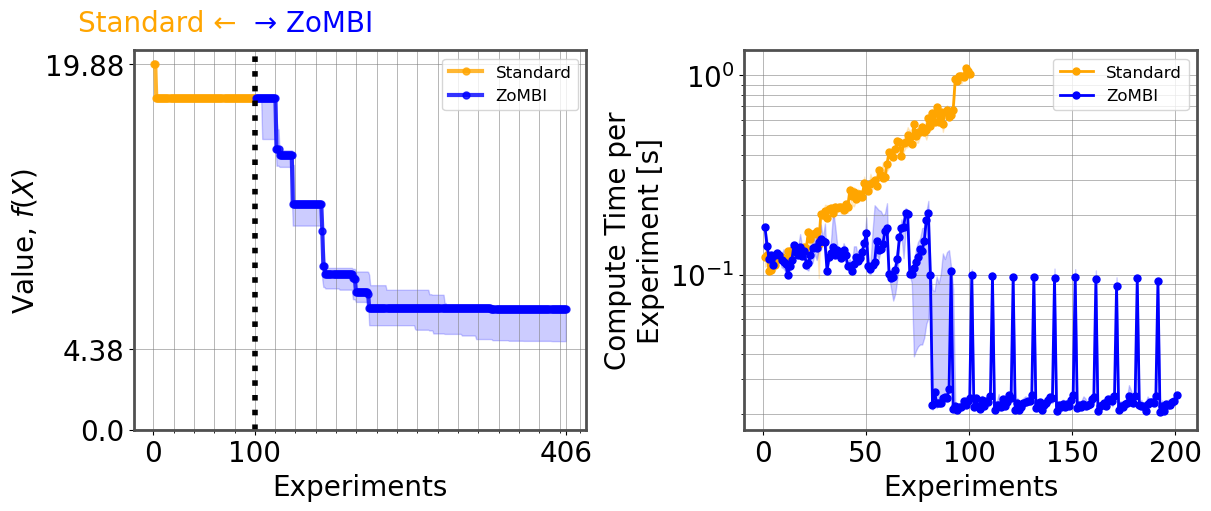

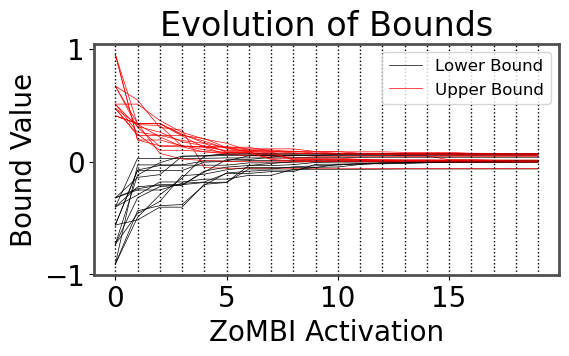

In [2]:
# Build analytical model
def ackley(x, b=0.5, a=20, c=2*np.pi, limit=15):
    """
    x: vector of input values
    """
    x = x.T * limit
    d = len(x) # dimension of input vector x
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum(x*x) / d))
    cos_term = -np.exp(sum(np.cos(c*x) / d))
    return a + np.exp(1) + sum_sq_term + cos_term

# Construct dataset from model
dimensions = 5 # 5D Ackley function
lower = -1 *  np.ones((1, dimensions))[0] # -1 lower sampling bounds
upper = np.ones((1, dimensions))[0] # 1 upper sampling bounds
np.random.seed(123) # seed for repeatability
X_sample_norm = diversipy.polytope.sample(n_points=100000, lower=lower, upper=upper, thin=0) # X dataset with 100,000 datapoints
y_sample_mean = -1 * ackley(X_sample_norm) # fX dataset
X0 = diversipy.polytope.sample(n_points=5, lower=lower, upper=upper, thin=0) # initialization X dataset with 5 points
y0 = -1*ackley(X0) # initialization fX

# Run ZoMBI
zombi = ZoMBI(dataset_X = X_sample_norm, # X data
             dataset_fX = y_sample_mean, # fX data
             fX_model = ackley, # model to predict f(X) from X
             BO = EI_abrupt, # acquisition function options: LCB, EI, LCB_ada, EI_abrupt
             nregular = 100, # number of regular BO experiments before ZoMBI
             activations = 20, # number of ZoMBI activations
             memory = 5, # number of memory points to retain per ZoMBI activation
             forward = 10, # number of forward experiments per ZoMBI activation
             ensemble = 3) # number of ensemble runs
zombi.optimize(X_initial = X0, fX_initial = y0, plot_f = True) # instantiate with initialization dataset

In [3]:
print(zombi.X, # .X grabs all X values
      zombi.fX_min) # .fX grabs running minimum fX values

[[ 0.29068082  0.16087312  0.12979943  0.50914553  0.33106087]
 [ 0.45708587  0.75101304 -0.16095682  0.31408134  0.93727585]
 [ 0.33628696  0.30240445 -0.11558069 -0.11903629  0.19168678]
 ...
 [-0.00339362  0.00522851 -0.00103565  0.07069281 -0.00291014]
 [-0.00339362  0.00522851 -0.00103565  0.07069281 -0.00291014]
 [-0.00339362  0.00522851 -0.00103565  0.07069281 -0.00291014]] [[19.87766539 19.87766539 18.02735453 ...  6.62009885  6.62009885
   6.62009885]
 [19.87766539 19.87766539 18.02735453 ...  6.57068178  6.57068178
   6.57068178]
 [19.87766539 19.87766539 18.02735453 ...  4.37770034  4.37770034
   4.37770034]]


## Example 2: Negative Poisson's Ratio
#### Dataset obtained from [Materials Project](https://materialsproject.org/). Dataset is comprised of 146,323 materials and only ~1,192 or 0.81% of the total have a negative Poisson's ratio.

--------------------------------

##### X: {molecular density, atomic energy, Fermi energy, energy above hull, band gap}; f(X): {Poisson's Ratio)

##### Random Forest Regression with 500 trees is used to train the predictive model. The trained model is available for use as "poisson_RF_trained.pkl".

Ensemble 1, ZoMBI Activation 10 / 10 : [❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚        ] 10 / 10 experiments completed . . .                                    

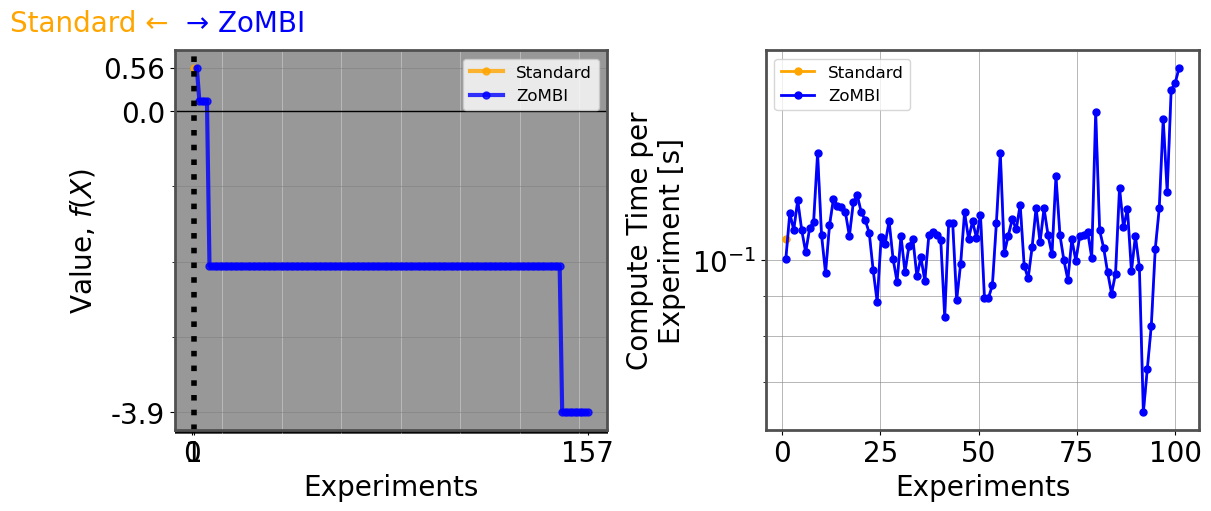

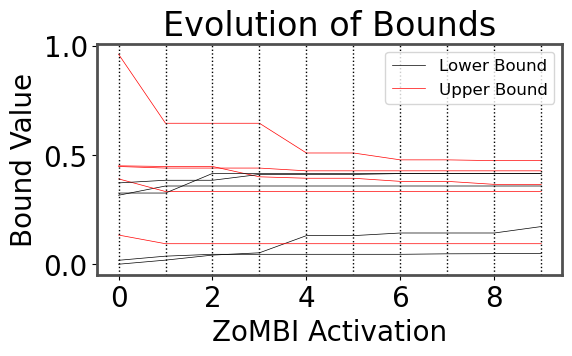

In [6]:
# # Build the predictive model
# datapath = os.path.join(os.getcwd(), 'data') # file path to the trained model
# poisson_model = joblib.load(os.path.join(datapath, "poisson", 'poisson_RF_trained.pkl')) # load the trained model
# poisson_model = poisson_model.predict # call the prediction function

# # Construct dataset from model
# dimensions = 5 # 5D X-dataset used to train the RF model
# lower = np.zeros((1, dimensions))[0] # 0 lower sampling bounds
# upper = np.ones((1, dimensions))[0] # 1 upper sampling bounds
# np.random.seed(1) # seed for repeatability
# X_sample_norm = diversipy.polytope.sample(n_points=100000, lower=lower, upper=upper, thin=0) # X dataset with 100,000 datapoints
# y_sample_mean = -1 * poisson_model(X_sample_norm) # fX dataset
# X0 = diversipy.polytope.sample(n_points=5, lower=lower, upper=upper, thin=0) # initialization X dataset with 5 points
# y0 = -1 * poisson_model(X0) # initialization fX

# # Run ZoMBI
# zombi = ZoMBI(dataset_X = X_sample_norm, # X data
#              dataset_fX = y_sample_mean, # fX data
#              fX_model = poisson_model, # model to predict f(X) from X
#              BO = LCB_ada, # acquisition function options: LCB, EI, LCB_ada, EI_abrupt
#              nregular = 1, # number of regular BO experiments before ZoMBI
#              activations = 10, # number of ZoMBI activations
#              memory = 5, # number of memory points to retain per ZoMBI activation
#              forward = 10, # number of forward experiments per ZoMBI activation
#              ensemble = 1) # number of ensemble runs
# zombi.optimize(X_initial = X0, fX_initial = y0) # instantiate with initialization dataset

# Example 3: Thermoelectric Example

In [1]:
from zombi import *
import diversipy
import numpy as np
import os
import joblib
import pandas as pd

Load data

In [52]:
datapath = os.path.join(os.getcwd(), 'data') # file path to the trained model
zt_path = os.path.join(datapath, "thermoelectric", "df_zt.csv")
df = pd.read_csv(zt_path)
df = df[df["energy_above_hull"] < 2] #remove outliers with really high energy above hull
df.head()

,material_id,formula_pretty,density,energy_per_atom,efermi,energy_above_hull,band_gap,e_total,formula,data.Sᵉ.p.v.value,data.Sᵉ.p.T.value,data.σᵉ.p.v.value,data.σᵉ.p.T.value,data.κₑᵉ.p.v.value,data.κₑᵉ.p.T.value,ZT
0,mp-555976,Na2TiSiO5,2.993781,-7.520115,1.749906,0.002698,3.2081,9.543460,Na2TiSiO5,1229.92,1200,861.811,100,0.202221,100,0.061185
1,mp-773512,Tm2WO6,8.784818,-9.064976,1.827234,0.010585,3.7669,17.598888,Tm2WO6,1268.94,1300,329.270,100,0.039499,100,0.136495
2,mp-753798,Rb2SnO3,4.617657,-5.392300,1.417259,0.000000,2.1213,63.652669,Rb2SnO3,1221.93,800,802.542,100,0.160830,100,0.050509
3,mp-23475,Rb2PbCl6,3.371128,-3.569039,-0.721081,0.000000,1.2605,10.191867,Rb2PbCl6,1189.61,500,1215.340,100,0.205056,100,0.039803
4,mp-569051,MgH2,1.611010,-3.049237,2.040691,0.040386,2.2260,17.613794,MgH2,1088.68,900,3613.180,100,0.660864,100,0.048322


In [53]:
features = ["density", "energy_per_atom", "efermi", "energy_above_hull", "band_gap"]
target = "ZT"

Ensemble 3, ZoMBI Activation 10 / 10 : [❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚        ] 10 / 10 experiments completed . . .                                    

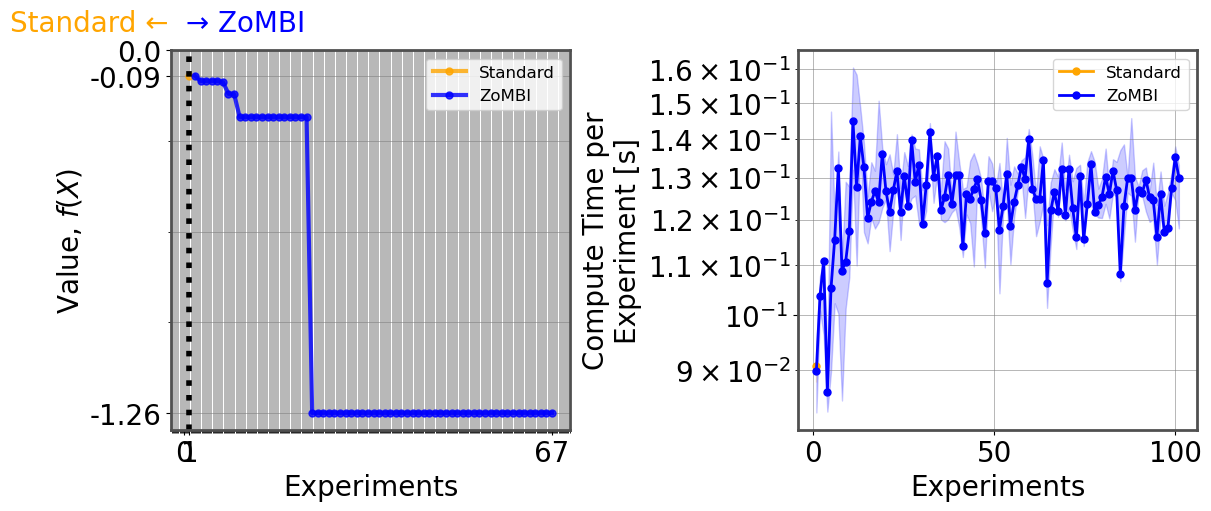

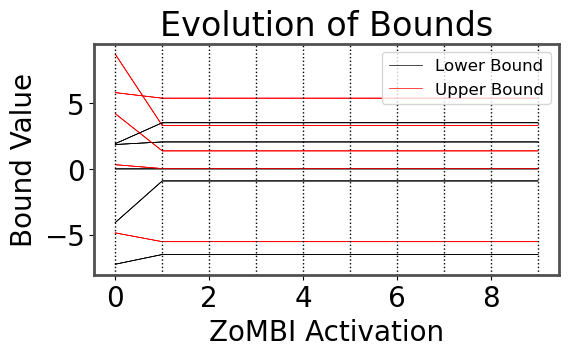

In [92]:
# Construct dataset from model
X = df[features].values
y = df[target].values

lhs_idx = discrete_LHS(X, 5, return_indices=True)
X0 = X[lhs_idx]
y0 = y[lhs_idx]

# Run ZoMBI
zombi = ZoMBI(dataset_X = X, # X data
             dataset_fX = y, # fX data
            #  fX_model = poisson_model, # model to predict f(X) from X
             BO = LCB_ada, # acquisition function options: LCB, EI, LCB_ada, EI_abrupt
             nregular = 1, # number of regular BO experiments before ZoMBI
             activations = 10, # number of ZoMBI activations
             memory = 5, # number of memory points to retain per ZoMBI activation
             forward = 10, # number of forward experiments per ZoMBI activation
             ensemble = 3) # number of ensemble runs
zombi.optimize(X_initial = X0, fX_initial = y0) # instantiate with initialization dataset

Show ZoMBI bounds on pairplot

In [86]:
mem = np.unique(zombi.fX_i, return_index=True)[1][-zombi.memory :]

min_vector = np.min(
    zombi.X_i[mem, :], axis=0
)  # min bounds of last sampled points
max_vector = np.max(
    zombi.X_i[mem, :], axis=0
)  # max bounds of last samples points

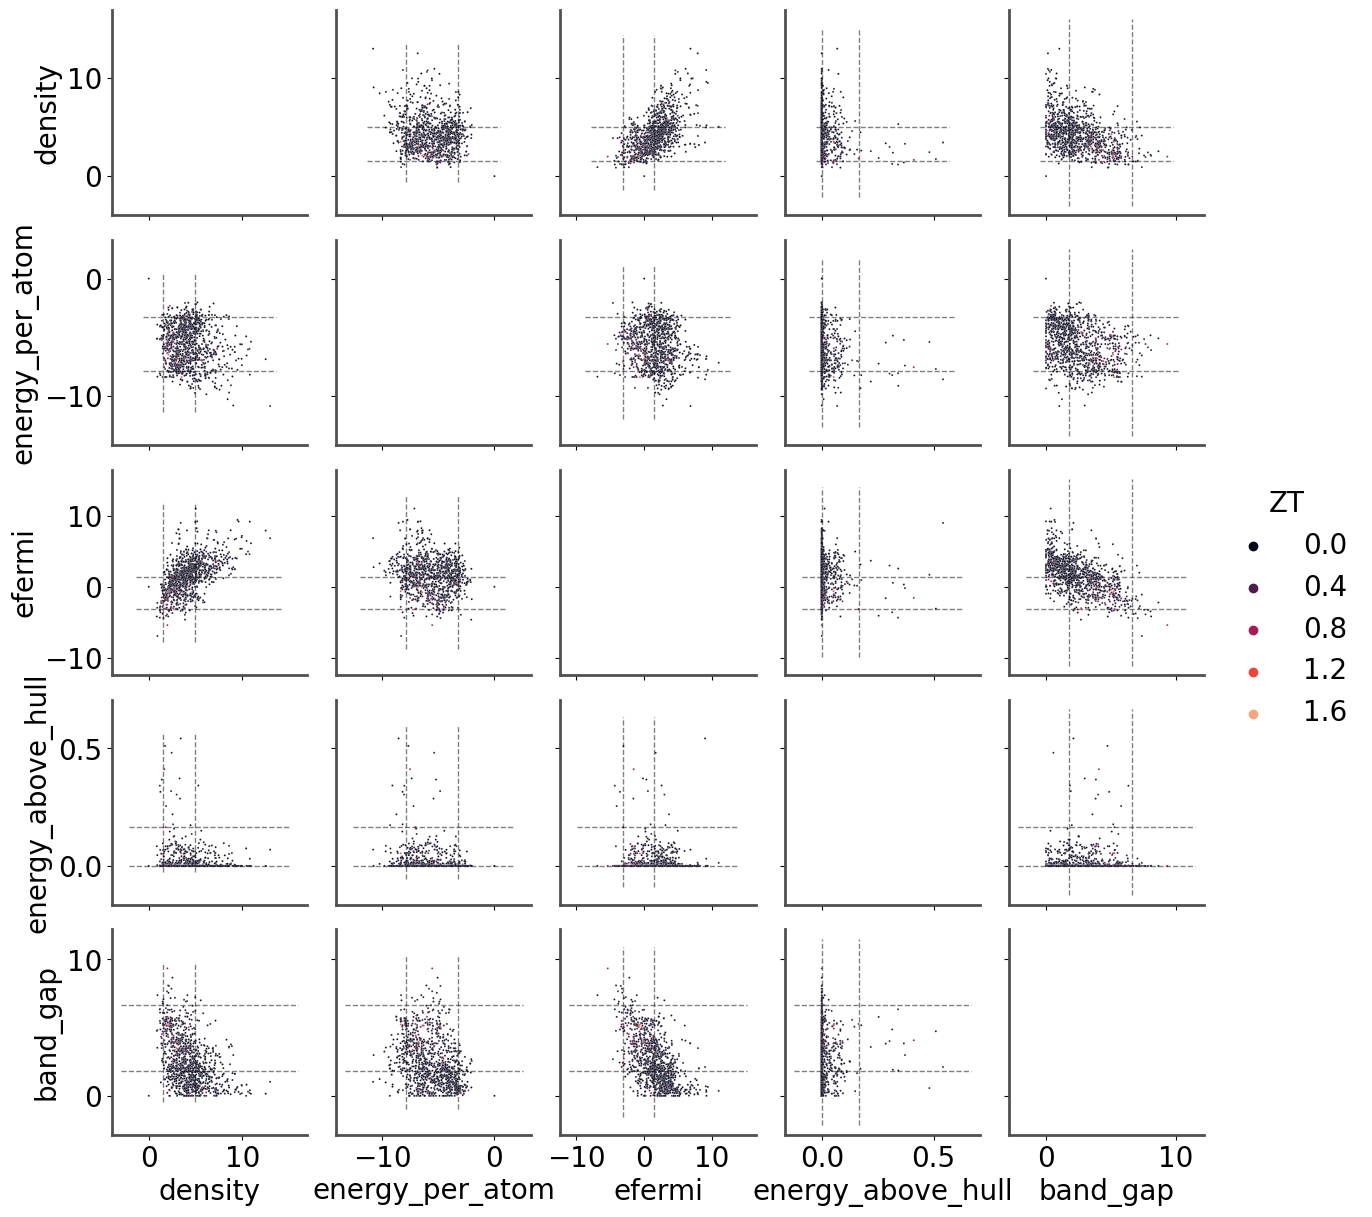

In [87]:
g = sns.pairplot(
    data=df[features + [target]],
    hue=target,
    palette="rocket",
    plot_kws = dict(
        s=2,
    )
)

line_kws = dict(
    linestyle="--",
    color="black",
    linewidth=1,
    alpha=0.5,
)
for ax_, xub, xlb in zip(g.axes, max_vector, min_vector):
    for ax__, yub, ylb in zip(ax_, max_vector, min_vector):
        if xub == yub:
            continue #assume we are at the diagonal
        ax__.hlines([xub, xlb], *ax__.get_xlim(), **line_kws)
        ax__.vlines([yub, ylb], *ax__.get_ylim(), **line_kws)


In [64]:
min_vector

array([ 1.79856016e+00, -7.05589806e+00, -3.12218265e+00,  5.88950000e-04,
        3.27790000e+00])

In [65]:
max_vector

array([ 3.68308773, -5.3121402 , -1.10786115,  0.16468606,  5.2637    ])

In [70]:
print(zombi.dataset_X[21] >= min_vector)
print(zombi.dataset_X[21] <= max_vector)

[ True  True  True  True  True]
[False  True False  True False]


In [66]:
for i, row in enumerate(zombi.dataset_X):
    if np.all(row > min_vector) and np.all(row < max_vector):
        print(i)

22
181
619
961


In [63]:
from utils import find_indices_within_bounds

find_indices_within_bounds(zombi.dataset_X, min_vector, max_vector).sum()

4

In [17]:
print(zombi.bound_l_i[-1])
print(zombi.bound_u_i[-1])

[ 3.28394955 -6.41844111 -1.36024062  0.0101879   3.4194    ]
[ 4.96159698 -5.51635181  1.36570586  2.81027333  6.2167    ]
